In [1]:
from tensorflow.keras.datasets import mnist
#from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [3]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.06426, saving model to ./model/01-0.0643.hdf5

Epoch 00002: val_loss improved from 0.06426 to 0.03808, saving model to ./model/02-0.0381.hdf5

Epoch 00003: val_loss improved from 0.03808 to 0.03286, saving model to ./model/03-0.0329.hdf5

Epoch 00004: val_loss improved from 0.03286 to 0.03077, saving model to ./model/04-0.0308.hdf5

Epoch 00005: val_loss did not improve from 0.03077

Epoch 00006: val_loss did not improve from 0.03077

Epoch 00007: val_loss improved from 0.03077 to 0.02972, saving model to ./model/07-0.0297.hdf5

Epoch 00008: val_loss improved from 0.02972 to 0.02796, saving model to ./model/08-0.0280.hdf5

Epoch 00009: val_loss improved from 0.02796 to 0.02779, saving model to ./model/09-0.0278.hdf5

Epoch 00010: val_loss did not improve from 0.02779

Epoch 00011: val_loss improved from 0.02779 to 0.02708, saving model to ./model/11-0.0271.hdf5

Epoch 00012: val_loss did not improve from 0.02708

Epoch 00013: val_loss did n

In [7]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 125us/sample - loss: 0.0315 - accuracy: 0.9936

 Test Accuracy: 0.9936


In [8]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

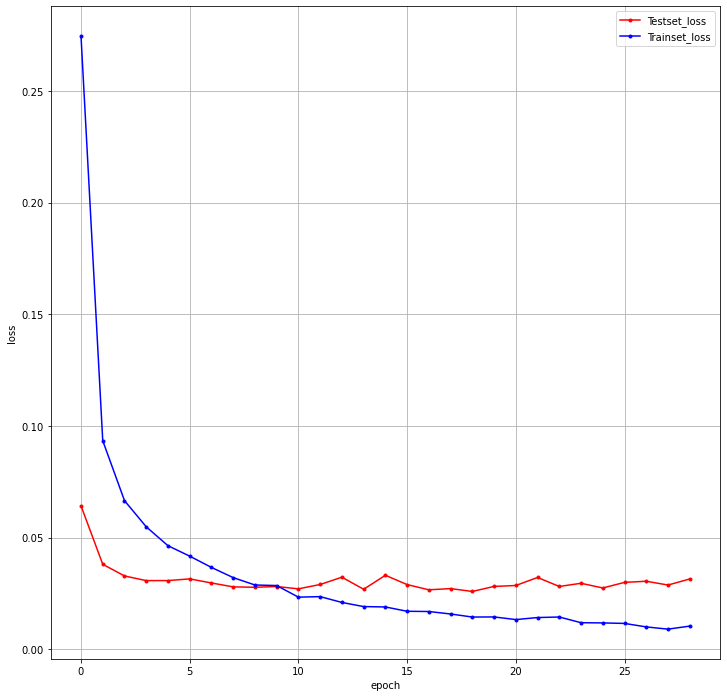

In [10]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.figure(figsize=(12,12))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()